In [85]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import zscore
from scipy.stats import iqr
import matplotlib.pyplot as plt
import plotly.express as px     # histogram, box-plot
import seaborn as sns

In [8]:
df = pd.read_csv("C:/Users/go27s/OneDrive/Documents/Udemy/Statistics and Probability/Statistics/customer_income_data.csv")

In [9]:
df.head()

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    int64  
 1   CustomerGender  200 non-null    object 
 2   CustomerAge     200 non-null    int64  
 3   CustomerCity    200 non-null    object 
 4   AnnualIncome    200 non-null    float64
 5   CreditScore     200 non-null    int64  
 6   SpendingScore   200 non-null    int64  
 7   CustomerCityID  200 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 12.6+ KB


In [68]:
# check for null values

df.isnull().sum()

CustomerID              0
CustomerGender          0
CustomerAge             0
CustomerCity            0
AnnualIncome            0
CreditScore             0
SpendingScore           0
CustomerCityID          0
SpendingScore_zscore    0
SpendingScore_mean      0
SpendingScore_var       0
SpendingScore_std       0
SpendingScore_skew      0
AnnualIncome_std        0
AnnualIncome_mean       0
AnnualIncome_zscore     0
dtype: int64

In [4]:
# Drop the rows where at least one element is missing
# df.dropna(inplace = True)

In [71]:
df['AnnualIncome_mean'] = df['AnnualIncome'].mean() # 285143

In [72]:
df['AnnualIncome'].median() # 263418

263418.50555

In [73]:
df['AnnualIncome'].mode()

0        2577.057456
1        5121.652342
2       10349.414070
3       12396.061280
4       15305.842870
           ...      
195    651534.309800
196    671028.187200
197    675461.735700
198    687212.770700
199    695407.091700
Name: AnnualIncome, Length: 200, dtype: float64

In [74]:
df['AnnualIncome_std'] = df['AnnualIncome'].std()  # 169229

In [75]:
# Check for outliers using z-score

# z-score of 2.5 indicates that the data point is 2.5 standard deviation away from the mean. 
# Usually z-score = 3 is considered as a cut-off value to set the limit. 
# Therefore, any z-score greater than +3 or less than -3 is considered as outlier 
# which is pretty much similar to standard deviation method

In [76]:
df['AnnualIncome_zscore'] = (df['AnnualIncome'] - df['AnnualIncome_mean']) / df['AnnualIncome_std']

In [79]:
df_outlier_ai = df[abs(df['AnnualIncome_zscore']) > 2]

In [80]:
df_outlier_ai

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID,SpendingScore_zscore,SpendingScore_mean,SpendingScore_var,SpendingScore_std,SpendingScore_skew,AnnualIncome_std,AnnualIncome_mean,AnnualIncome_zscore
62,1063,Female,39,Bengaluru,675461.7357,849,59,1,0.288796,50.705,824.99294,28.72269,0.100818,169229.187619,285143.931646,2.306445
65,1066,Male,34,Chennai,625214.1659,632,14,2,-1.277910,50.705,824.99294,28.72269,0.100818,169229.187619,285143.931646,2.009525
114,1115,Female,51,Chennai,687212.7707,553,100,2,1.716239,50.705,824.99294,28.72269,0.100818,169229.187619,285143.931646,2.375884
148,1149,Female,62,Bengaluru,651534.3098,884,23,1,-0.964568,50.705,824.99294,28.72269,0.100818,169229.187619,285143.931646,2.165054
155,1156,Female,60,Mumbai,671028.1872,605,55,5,0.149533,50.705,824.99294,28.72269,0.100818,169229.187619,285143.931646,2.280246
166,1167,Male,21,Bengaluru,695407.0917,718,86,1,1.228819,50.705,824.99294,28.72269,0.100818,169229.187619,285143.931646,2.424305
171,1172,Male,56,Mumbai,648085.0454,605,35,5,-0.546780,50.705,824.99294,28.72269,0.100818,169229.187619,285143.931646,2.144672
177,1178,Male,22,Chennai,634980.9806,844,21,2,-1.034200,50.705,824.99294,28.72269,0.100818,169229.187619,285143.931646,2.067238
194,1195,Female,48,Chennai,630148.5131,833,91,2,1.402898,50.705,824.99294,28.72269,0.100818,169229.187619,285143.931646,2.038682


In [41]:
df['SpendingScore_mean'] = df['SpendingScore'].mean()  # 50.705

In [42]:
# Variance - how far are the observations from the mean()
df['SpendingScore_var'] = df['SpendingScore'].var() # 824.99 - extremely spread out as mean is 50

In [43]:
df['SpendingScore_std'] = df['SpendingScore'].std() # 28 - high as mean is 50

In [44]:
df['SpendingScore_skew'] = skew(df['SpendingScore']) # 0.1 - left skewed

In [45]:
# Calculate z-score

df['SpendingScore_zscore'] = (df['SpendingScore'] - df['SpendingScore_mean']) / df['SpendingScore_std']

In [46]:
df.head()

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID,SpendingScore_zscore,SpendingScore_mean,SpendingScore_var,SpendingScore_std,SpendingScore_skew
0,1001,Male,49,Bengaluru,527547.58850,653,78,1,0.950294,50.705,824.99294,28.72269,0.100818
1,1002,Male,59,Bengaluru,207143.19760,630,63,1,0.428059,50.705,824.99294,28.72269,0.100818
2,1003,Female,54,Delhi,164423.84570,555,69,4,0.636953,50.705,824.99294,28.72269,0.100818
3,1004,Female,42,Bengaluru,56220.36443,699,30,1,-0.720859,50.705,824.99294,28.72269,0.100818
4,1005,Female,30,Bengaluru,256194.36190,793,6,1,-1.556435,50.705,824.99294,28.72269,0.100818


In [83]:
# Check for outliers using z-score

# z-score of 2.5 indicates that the data point is 2.5 standard deviation away from the mean. 
# Usually z-score = 3 is considered as a cut-off value to set the limit. 
# Therefore, any z-score greater than +3 or less than -3 is considered as outlier 
# which is pretty much similar to standard deviation method

df_ss_outlier = df[abs(df['SpendingScore_zscore']) > 2]  # 

In [84]:
df_ss_outlier

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID,SpendingScore_zscore,SpendingScore_mean,SpendingScore_var,SpendingScore_std,SpendingScore_skew,AnnualIncome_std,AnnualIncome_mean,AnnualIncome_zscore


In [64]:
# Histogram - representation of the distribution of numerical data
df_histogram_ss = px.histogram(df, x = 'SpendingScore')
df_histogram_ss.show()

In [65]:
df_box_plot_ss = px.box(df, y= 'SpendingScore')
df_box_plot_ss.show()

In [66]:
df_histogram_ai = px.histogram(df, x = 'AnnualIncome')
df_histogram_ai.show()

In [67]:
df_box_plot_ai = px.box(df, x = 'AnnualIncome')
df_box_plot_ai.show()

<AxesSubplot:xlabel='CustomerAge', ylabel='SpendingScore'>

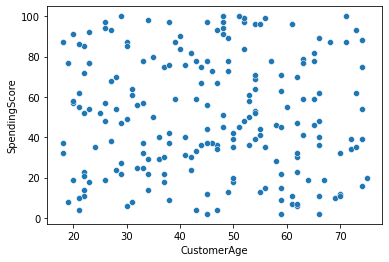

In [86]:
sns.scatterplot # it's random data set. No outliers

<AxesSubplot:xlabel='CustomerAge', ylabel='AnnualIncome'>

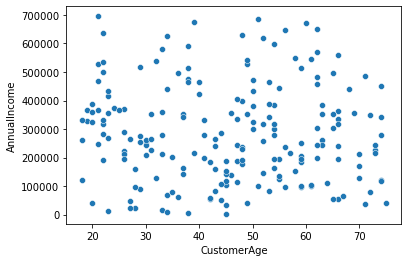

In [87]:
sns.scatterplot(x = 'CustomerAge', y = 'AnnualIncome', data = df)